Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [4]:
import pandas as pd

# Joining the two dataframes

flattenedfoursquaredata = pd.read_csv('..\\data\\flattenedfoursquaredata.csv')

flattenedyelpdata4=pd.read_csv('..\\data\\flattenedyelpdata4.csv')

new_dataframe = pd.concat([flattenedfoursquaredata, flattenedyelpdata4])

new_dataframe



,fsq_id,categories,chains,closed_bucket,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,...,display_phone,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.state,location.display_address
0,4d93318162ad5481a9ec7b4b,"[{'id': 10027, 'name': 'Museum', 'short_name':...",[],VeryLikelyOpen,172.000000,/v3/places/4d93318162ad5481a9ec7b4b,Whitehern Historic House and Garden,America/Toronto,43.254593,-79.872110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50a19225e4b035e940520491,"[{'id': 13305, 'name': 'Burrito Restaurant', '...",[],VeryLikelyOpen,320.000000,/v3/places/50a19225e4b035e940520491,Burrito Boyz,America/Toronto,43.255691,-79.867215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55de230f498eecf46f6652a2,"[{'id': 13306, 'name': 'Taco Restaurant', 'sho...",[],VeryLikelyOpen,343.000000,/v3/places/55de230f498eecf46f6652a2,The Mule,America/Toronto,43.257258,-79.867202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4b628f4bf964a5205a4b2ae3,"[{'id': 17065, 'name': 'Farmers Market', 'shor...",[],VeryLikelyOpen,395.000000,/v3/places/4b628f4bf964a5205a4b2ae3,Hamilton Farmers' Market,America/Toronto,43.259041,-79.870193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51d2d6a9498e483fe7634ebf,"[{'id': 17069, 'name': 'Grocery Store', 'short...",[],VeryLikelyOpen,403.000000,/v3/places/51d2d6a9498e483fe7634ebf,Nations Fresh Food Market,America/Toronto,43.256720,-79.869105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,NaN,"[{'alias': 'japanese', 'title': 'Japanese'}]",NaN,NaN,434.625159,NaN,Sapporo Japanese Restaurant,NaN,NaN,NaN,...,+1 905-527-1668,43.254290,-79.866000,96 Main St E,NaN,NaN,Hamilton,L8N 1G3,ON,"['96 Main St E', 'Hamilton, ON L8N 1G3', 'Cana..."
2876,NaN,"[{'alias': 'bbq', 'title': 'Barbeque'}]",NaN,NaN,870.642254,NaN,Charred Chicken,NaN,NaN,NaN,...,+1 289-396-0662,43.262736,-79.866384,244 James Street N,NaN,NaN,Hamilton,L8R 2L2,ON,"['244 James Street N', 'Hamilton, ON L8R 2L2',..."
2877,NaN,"[{'alias': 'mexican', 'title': 'Mexican'}]",NaN,NaN,902.751046,NaN,Mesa,NaN,NaN,NaN,...,+1 289-246-9696,43.263060,-79.866450,255 James Street N,NaN,NaN,Hamilton,L8R 2L2,ON,"['255 James Street N', 'Hamilton, ON L8R 2L2',..."
2878,NaN,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",NaN,NaN,554.376205,NaN,Ajio Sushi,NaN,NaN,NaN,...,+1 905-526-8888,43.217980,-79.745870,161 King Street E,NaN,NaN,Hamilton,L8R 1J6,ON,"['161 King Street E', 'Hamilton, ON L8R 1J6', ..."


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

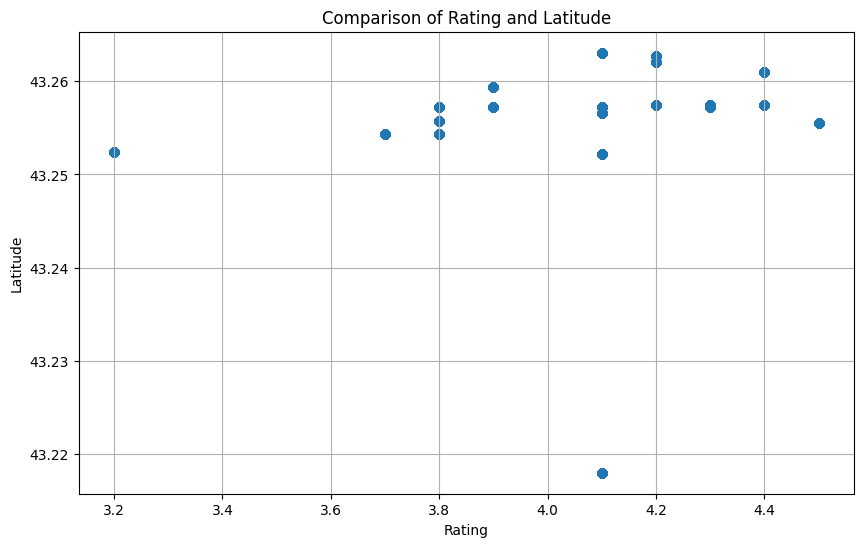

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Scatter plot to compare 'rating' and 'coordinates.latitude'
plt.figure(figsize=(10, 6))
plt.scatter(new_dataframe['rating'], new_dataframe['coordinates.latitude'], alpha=0.5)
plt.title('Comparison of Rating and Latitude')
plt.xlabel('Rating')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


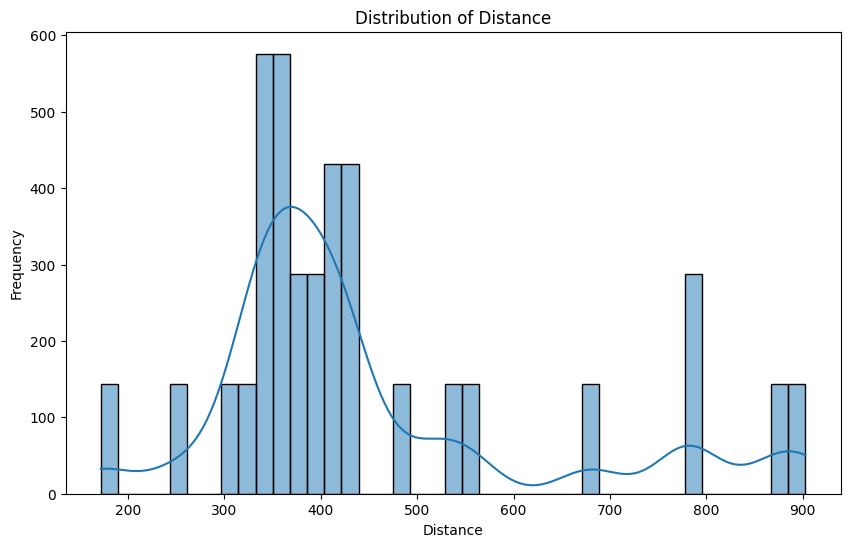

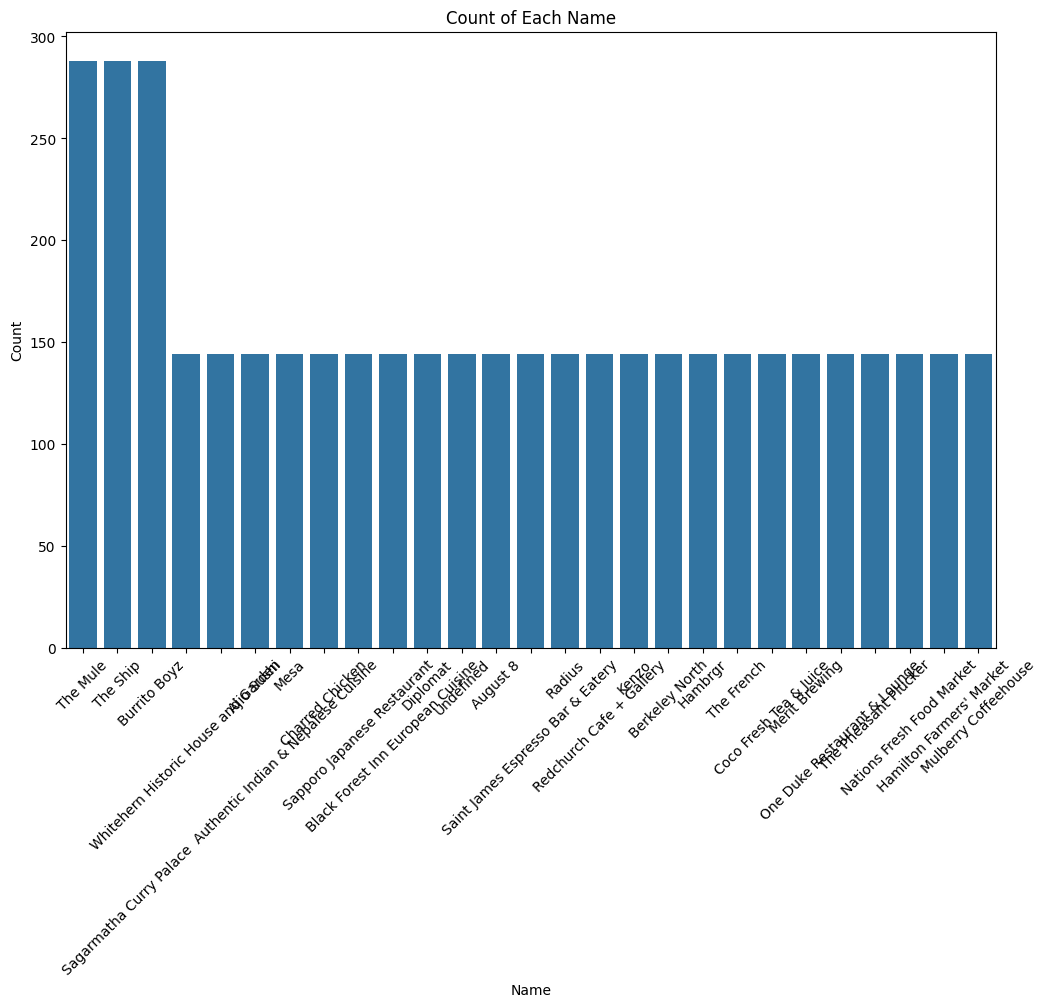

In [14]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

#Show distribution of distance of each POI to the main ll

# # Distribution of 'distance'
# plt.figure(figsize=(10, 6))
# sns.histplot(new_dataframe['distance'], kde=True)
# plt.title('Distribution of Distance')
# plt.xlabel('Distance')
# plt.ylabel('Frequency')
# plt.show()

# # Count of each 'name'
# plt.figure(figsize=(12, 8))
# sns.countplot(data=new_dataframe, x='name', order=new_dataframe['name'].value_counts().index)
# plt.title('Count of Each Name')
# plt.xlabel('Name')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [16]:
import sqlite3
import pandas as pd

# Putting results in an SQLite3 database

# Create a connection to SQLite database
conn = sqlite3.connect('datacombine.db')

# Convert DataFrame to SQLite database table
new_dataframe.to_sql('data_table', conn, if_exists='replace', index=False)

# Commit changes and close connection
conn.commit()
conn.close()


Look at the data before and after the join to validate your data.

In [18]:
import pandas as pd

# for BEFORE view, Load the original DataFrames flattenedYELPdata4 and flattenedfoursquaredata
flattenedYELPdata4 = pd.read_csv('..\\data\\flattenedYELPdata4.csv')
flattenedfoursquaredata = pd.read_csv('..\\data\\flattenedfoursquaredata.csv')

# Before joining, validate the original data
print("Before joining:")
print("flattenedYELPdata4:")
print(flattenedYELPdata4.head())  # View the first few rows of flattenedYELPdata4
print("\ndf2:")
print(flattenedfoursquaredata.head())  # View the first few rows of flattenedfoursquaredata


Before joining:
flattenedYELPdata4:
                       id                            alias  \
0  h2mI1wBIK1PyaNupaL58gw                the-mule-hamilton   
1  bHecMQ85o3ayw1t9hRA90g              the-french-hamilton   
2  752Fv2jKafftvoS3Twkqyg                 hambrgr-hamilton   
3  xwVB61hW9rpyp6wALR4Apg        berkeley-north-hamilton-2   
4  wZr3xBFhGfYMY-mqwsQuNQ  redchurch-cafe-gallery-hamilton   

                       name  \
0                  The Mule   
1                The French   
2                   Hambrgr   
3            Berkeley North   
4  Redchurch Cafe + Gallery   

                                           image_url  is_closed  \
0  https://s3-media4.fl.yelpcdn.com/bphoto/bbhfnn...      False   
1  https://s3-media3.fl.yelpcdn.com/bphoto/Ha71df...      False   
2  https://s3-media2.fl.yelpcdn.com/bphoto/3QVAoc...      False   
3  https://s3-media1.fl.yelpcdn.com/bphoto/dR82Kl...      False   
4  https://s3-media4.fl.yelpcdn.com/bphoto/qua9YE...      False   

 

In [19]:
# Performing the join operation
new_dataframe1 = pd.merge(flattenedYELPdata4, flattenedfoursquaredata, on='name', how='right')

In [22]:
# Validating joint data
print("new_dataframe1:")
print(new_dataframe1.head())  # View the first few rows of the joined DataFrame

new_dataframe1:
                       id                  alias  \
0                     NaN                    NaN   
1  _Tl4-DH2ci_AVXq028__sg  burrito-boyz-hamilton   
2  _Tl4-DH2ci_AVXq028__sg  burrito-boyz-hamilton   
3  _Tl4-DH2ci_AVXq028__sg  burrito-boyz-hamilton   
4  _Tl4-DH2ci_AVXq028__sg  burrito-boyz-hamilton   

                                  name  \
0  Whitehern Historic House and Garden   
1                         Burrito Boyz   
2                         Burrito Boyz   
3                         Burrito Boyz   
4                         Burrito Boyz   

                                           image_url is_closed  \
0                                                NaN       NaN   
1  https://s3-media4.fl.yelpcdn.com/bphoto/p3C2_M...     False   
2  https://s3-media4.fl.yelpcdn.com/bphoto/p3C2_M...     False   
3  https://s3-media4.fl.yelpcdn.com/bphoto/p3C2_M...     False   
4  https://s3-media4.fl.yelpcdn.com/bphoto/p3C2_M...     False   

                     

In [ ]:
# Sending new_dataframe1 to CSV
new_dataframe1.to_csv('..\\data\\new_dataframe1.csv', index=False)
